<h1>LOANTAP BUSINESS CASE STUDY</h1>

#Problem Statement and Context
---

#### **Context:**
LoanTap is an online platform that provides tailored loan products to millennials, offering quick and flexible loans for salaried individuals and small businesses. Their aim is to make loans more accessible and customer-friendly. The data science team at LoanTap is building a credit evaluation system (underwriting layer) to determine whether a loan applicant is eligible for a personal loan.  

LoanTap offers several loan products, but this case study focuses on **personal loans**. These loans are unsecured, meaning they don't require collateral, so it's crucial to assess the applicant's creditworthiness accurately to minimize risks.

---

#### **Problem Statement:**
LoanTap needs to develop a model that:  
1. **Decides if a loan applicant is eligible for a personal loan.**  
   - Based on the applicant’s financial and personal information (e.g., income, credit history, and employment details), predict whether they can repay the loan or are at risk of defaulting.  

2. **Recommends suitable repayment terms if the applicant is eligible.**  
   - Suggest loan terms such as loan amount, interest rate, repayment period (36 or 60 months), and monthly installment. These recommendations should be fair to the borrower while ensuring profitability and minimizing risk for LoanTap.  

The model will use historical loan data to learn patterns of creditworthy and non-creditworthy applicants, as well as optimal repayment terms for different profiles.  

---

This system will help LoanTap approve loans efficiently while reducing defaults and improving customer satisfaction.

**Column name Descriptions**

* loan_amnt : The listed amount of the
loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.
* term : The number of payments on the loan. Values are in months and can be either 36 or 60.
* int_rate : Interest Rate on the loan
* installment : The monthly payment owed by the borrower if the loan originates.
* grade : LoanTap assigned loan grade
* sub_grade : LoanTap assigned loan subgrade
* emp_title :The job title supplied by the Borrower when applying for the loan.
* emp_length : Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
* home_ownership : The home ownership status provided by the borrower during registration or obtained from the credit report.
* annual_inc : The self-reported annual income provided by the borrower during registration.
* verification_status : Indicates if income was verified by LoanTap, not verified, or if the income source was verified
* issue_d : The month which the loan was funded
* loan_status : Current status of the loan - Target Variable
* purpose : A category provided by the borrower for the loan request.
* title : The loan title provided by the borrower
* dti : A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LoanTap loan, divided by the borrower’s self-reported monthly income.
* earliest_cr_line :The month the borrower's earliest reported credit line was opened
* open_acc : The number of open credit lines in the borrower's credit file.
* pub_rec : Number of derogatory public records
* revol_bal : Total credit revolving balance
* revol_util : Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
* total_acc : The total number of credit lines currently in the borrower's credit file
* initial_list_status : The initial listing status of the loan. Possible values are – W, F
* application_type : Indicates whether the loan is an individual application or a joint application with two co-borrowers
* mort_acc : Number of mortgage accounts.
* pub_rec_bankruptcies : Number of public record bankruptcies
* Address: Address of the individual

In [1]:
import pandas as pd
path=r"drive/MyDrive/logistic_regression.csv"
df = pd.read_csv(path)
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


**Count of records, non-null value counts, data types of the columns**

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

**Unique value count of each column**

In [3]:
df.nunique()

,0
loan_amnt,1397
term,2
int_rate,566
installment,55706
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
annual_inc,27197


**Null value count of each column**

In [4]:
df.isna().sum(axis=0)

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_title,22927
emp_length,18301
home_ownership,0
annual_inc,0


**Basic statistics of numerical columns**

In [5]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
categorical_columns = ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
                       'loan_status', 'purpose', 'initial_list_status', 'application_type']
continuous_columns = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'revol_bal', 'revol_util',
                      'total_acc', 'open_acc', 'mort_acc', 'pub_rec', 'pub_rec_bankruptcies']

# Exploratory data analysis

##Univariate analysis

###continuous variables

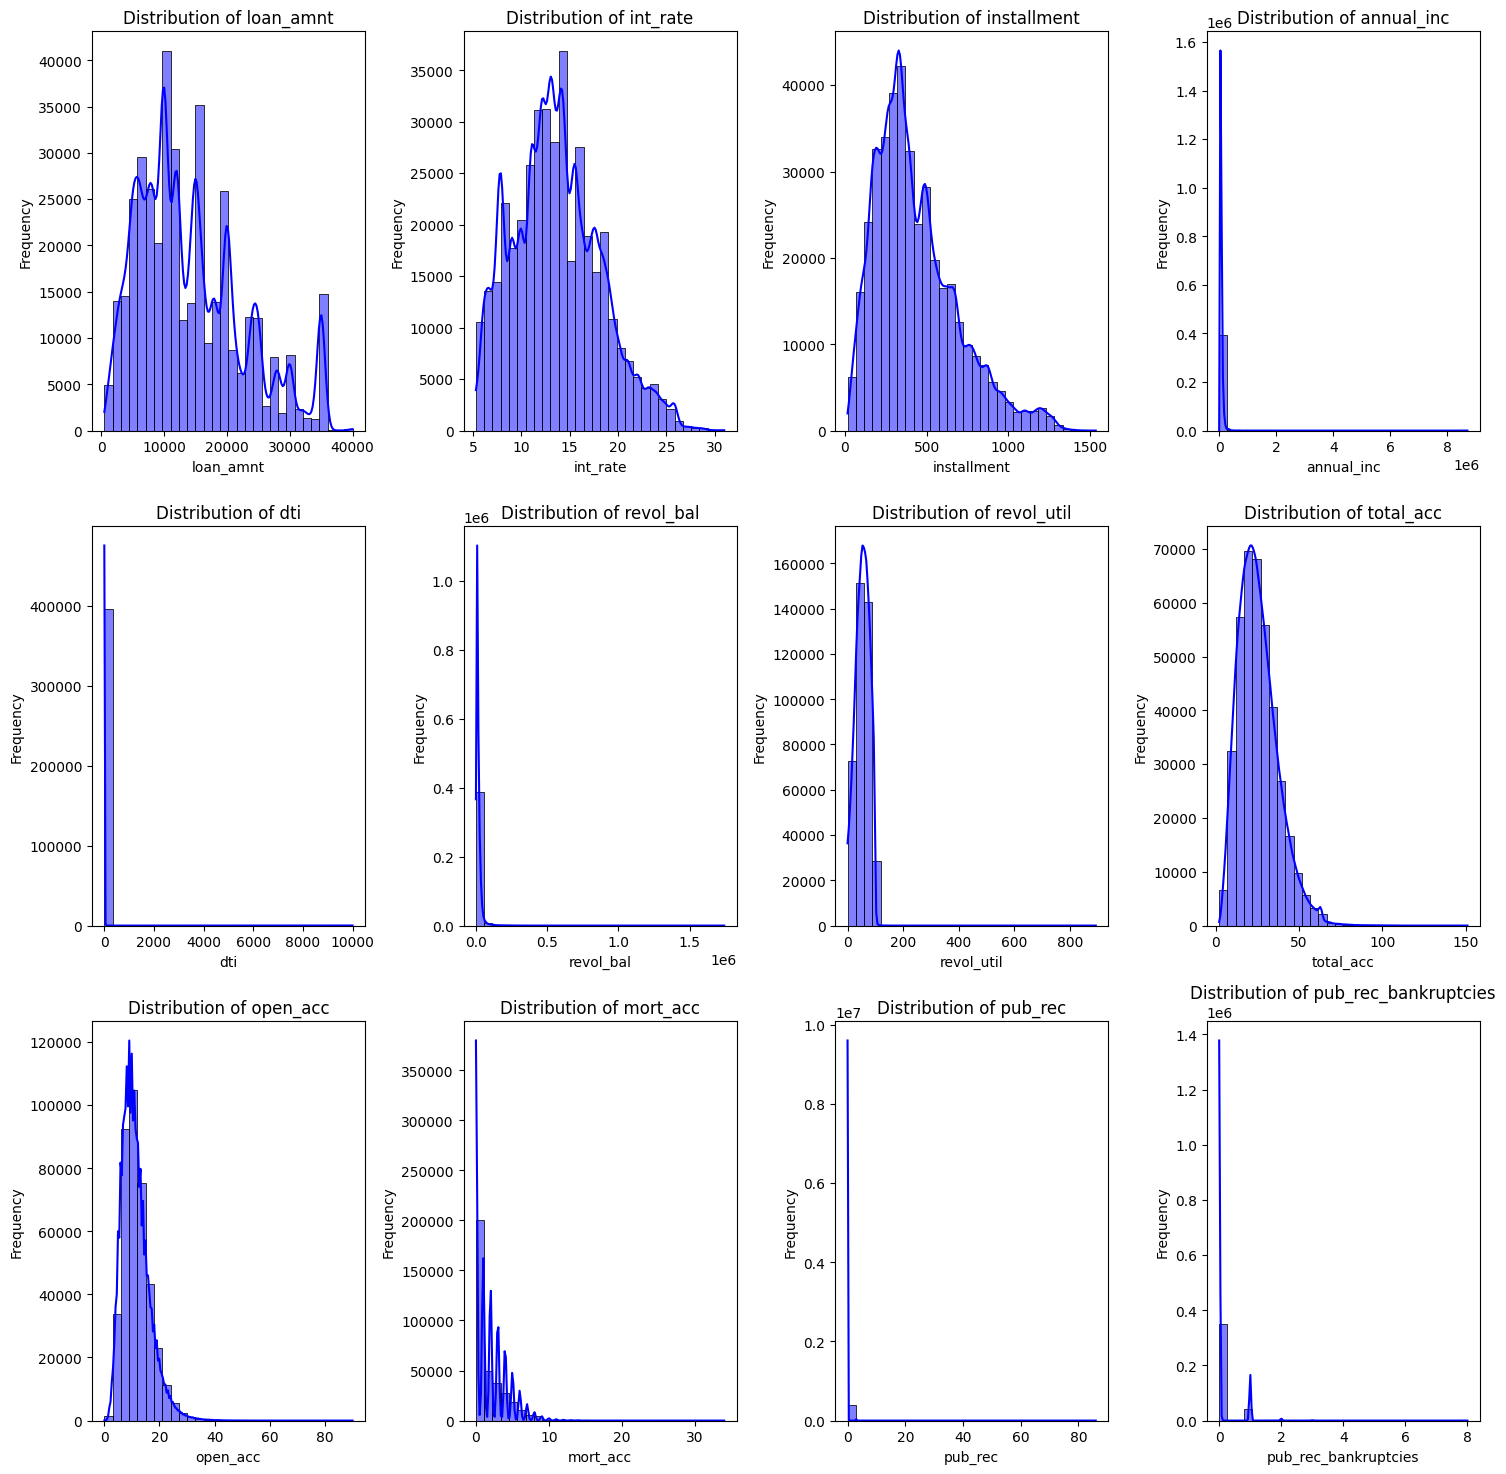

In [8]:
plt.figure(figsize=(15, 15))
for i, col in enumerate(continuous_columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

* Loan Amount (loan_amnt):

The distribution is right-skewed with the majority of loan amounts between $5,000 and $15,000. The pattern is similar to the previous observation.
* Interest Rate (int_rate):

The distribution is unimodal with most values between 10% and 20%. A slight skew is visible towards the higher end of the range.
* Installment (installment):

Right-skewed distribution, with most monthly payments below $500.
* Annual Income (annual_inc):

Extremely right-skewed, with a significant concentration below $200,000. Outliers extend to several million dollars.
* Debt-to-Income Ratio (dti):

Highly skewed, with most borrowers having a dti below 50. Extreme outliers suggest potential errors or unusual cases.
* Revolving Balance (revol_bal):

Right-skewed with most values below $100,000, though some borrowers have balances over $1 million.
* Revolving Utilization Rate (revol_util):

The distribution is concentrated below 100%, with peaks between 20% and 50%. Values above 100% may indicate issues.
* Total Accounts (total_acc):

Distribution resembles a bell curve, with most borrowers having between 10 and 50 accounts.
* Open Credit Lines (open_acc):

Positively skewed, with most borrowers having fewer than 20 open credit lines.
* Mortgage Accounts (mort_acc):

Highly right-skewed, with most borrowers having 0 or very few mortgage accounts.
* Public Records (pub_rec):

The vast majority of borrowers have no public derogatory records, leading to a sharp peak at 0.
* Public Record Bankruptcies (pub_rec_bankruptcies):

Most borrowers have no history of bankruptcies, indicated by a high frequency at 0. A small number have 1 or 2 bankruptcies.

**Observations**:
* Skewed Variables:

Most variables, like loan_amnt, annual_inc, dti, revol_bal, revol_util, and mort_acc, show significant skewness.
Log transformations or scaling might be necessary to make them suitable for predictive modeling.
* Dominance of Zeros:

Variables such as pub_rec, pub_rec_bankruptcies, and mort_acc have most values concentrated at 0, indicating either a lack of certain financial events or sparse data.
* Outliers:

Outliers are visible in several distributions, especially annual_inc, dti, and revol_bal. These need to be addressed before modeling.
Data Validation:

Variables like revol_util exceeding 100% and extreme outliers in annual_inc and dti suggest potential data quality issues that require closer inspection.

###categorical variables

<ipython-input-9-e65b53b0dd64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-9-e65b53b0dd64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-9-e65b53b0dd64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
<ipython-input-9-e65b53b0dd64>:4: FutureWarning: 

Passing `palette` without assigning `hue` is d

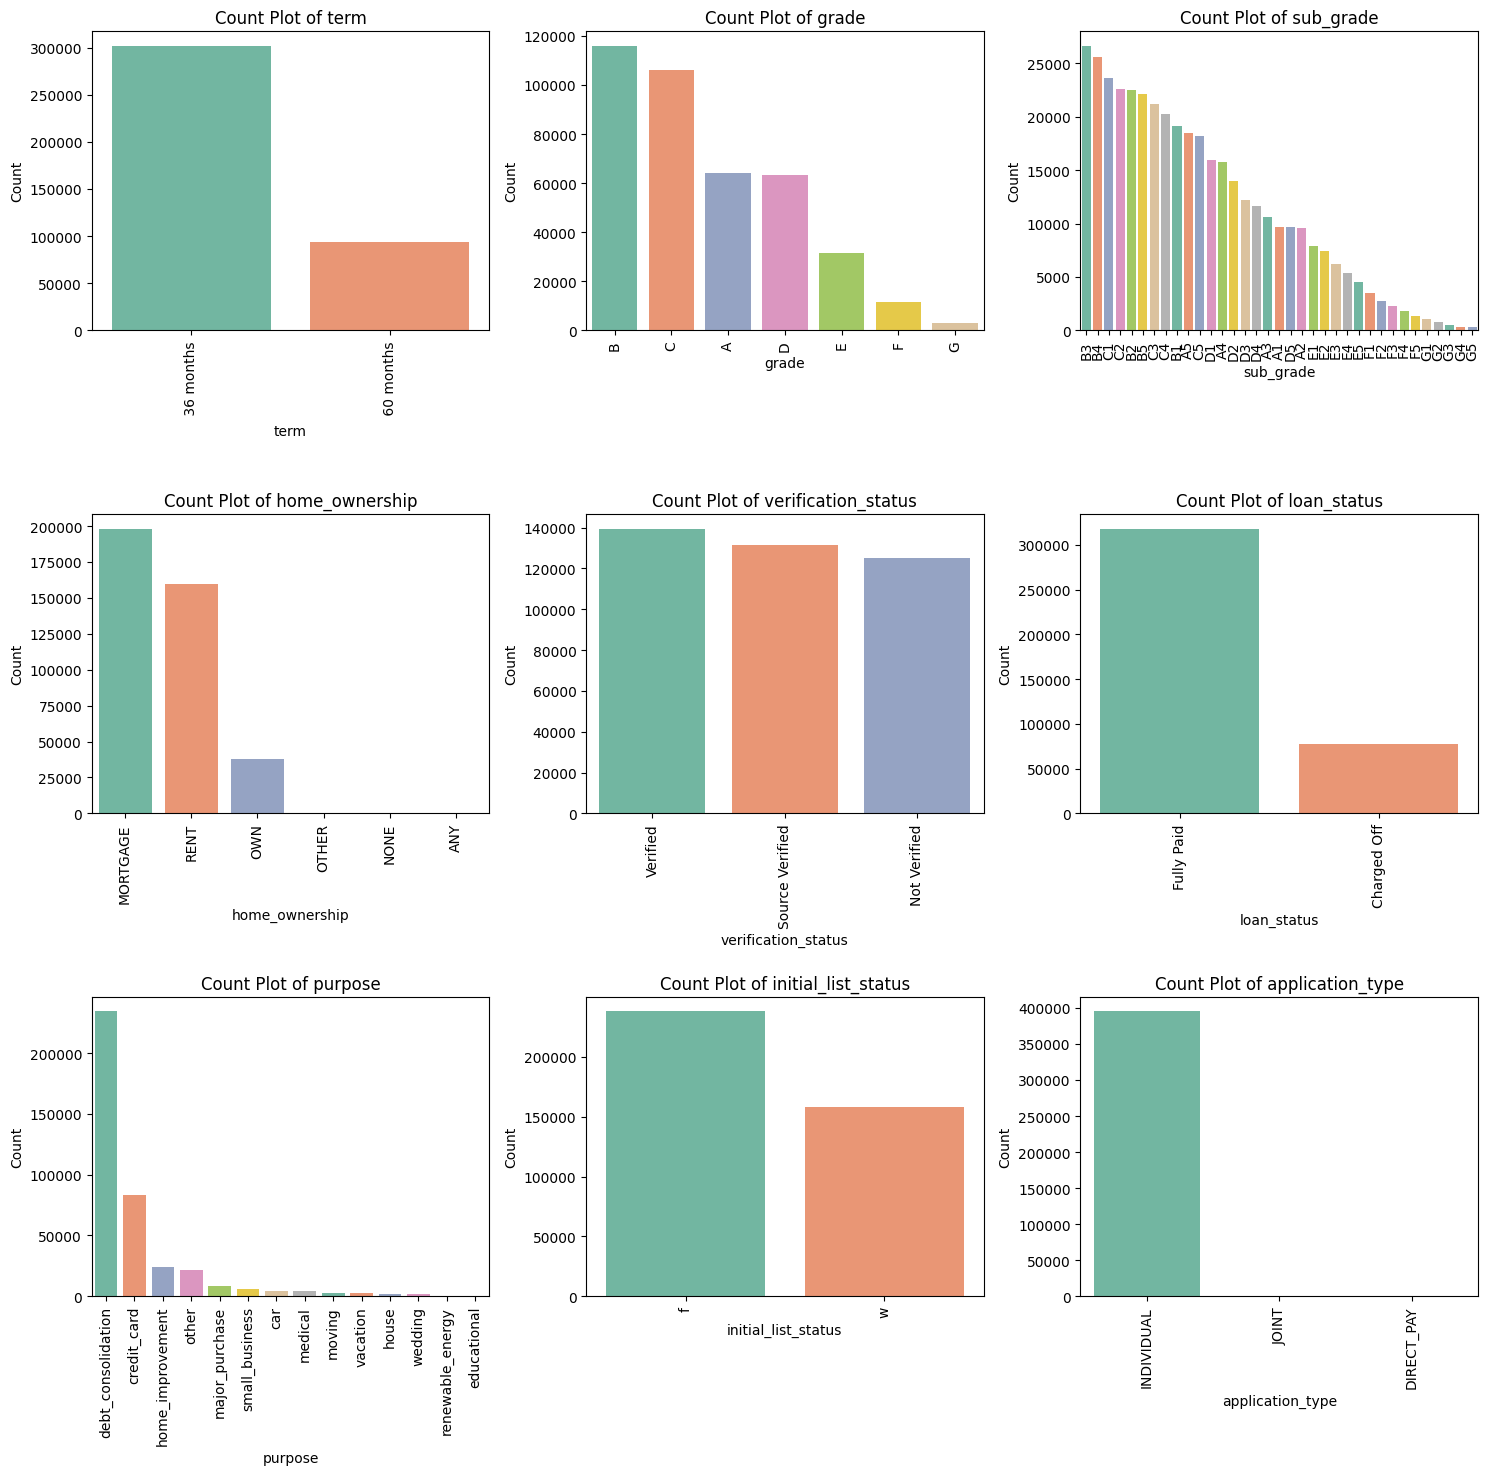

In [9]:
plt.figure(figsize=(15, 18))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df, x=col, palette='Set2', order=df[col].value_counts().index)
    plt.title(f"Count Plot of {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

1. Term:
A majority of the loans are for a term of 36 months compared to 60 months.
This indicates that borrowers may prefer shorter loan durations, possibly due to lower interest costs or faster repayment preferences.
2. Grade:
Most loans are concentrated in higher grades (e.g., A, B, C), which are typically associated with lower risk.
Fewer loans are assigned lower grades (e.g., F, G), indicating that LoanTap may approve fewer loans for high-risk profiles.
3. Sub-Grade:
The distribution shows a more granular breakdown of loan grades, with higher frequencies for sub-grades within A, B, and C.
The sub-grade pattern aligns with the overall grade distribution.
4. Home Ownership:
A significant proportion of borrowers have "MORTGAGE" or "RENT" as their homeownership status.
Borrowers with "OWN" as homeownership status form a smaller group, possibly because they have lesser need for additional loans or better credit profiles.
5. Verification Status:
A relatively equal split is observed among "Verified," "Source Verified," and "Not Verified" income statuses.
This suggests LoanTap processes loans with varying levels of income verification, which might influence loan performance.
6. Loan Status:
The majority of loans are "Fully Paid," while a smaller portion is "Charged Off."
This indicates that a significant portion of borrowers are successfully repaying their loans, but default risk still exists.
7. Purpose:
"Debt Consolidation" is the most common purpose for loans, followed by "Credit Card" and "Home Improvement."
Other purposes like "Wedding," "Vacation," and "Educational" have much lower frequencies, indicating they are less common reasons for borrowing.
8. Initial List Status:
Loans are almost evenly distributed between initial statuses "F" and "W."
This could reflect LoanTap’s operational strategy or the stage of loan processing.
9. Application Type:
Nearly all applications are "Individual," with very few "Joint" or other types of applications.
This suggests that most borrowers apply as individuals rather than co-borrowers.

**General Insights:** The data suggests that LoanTap caters primarily to borrowers with moderate to good creditworthiness (higher grades and sub-grades).
Borrowers commonly seek loans for consolidating debts or credit card repayment, indicating a focus on financial restructuring.
Most borrowers are either renting or have mortgages, which might influence their credit profile and loan approval criteria.

##Bivariate analysis

###continuous vs continuous

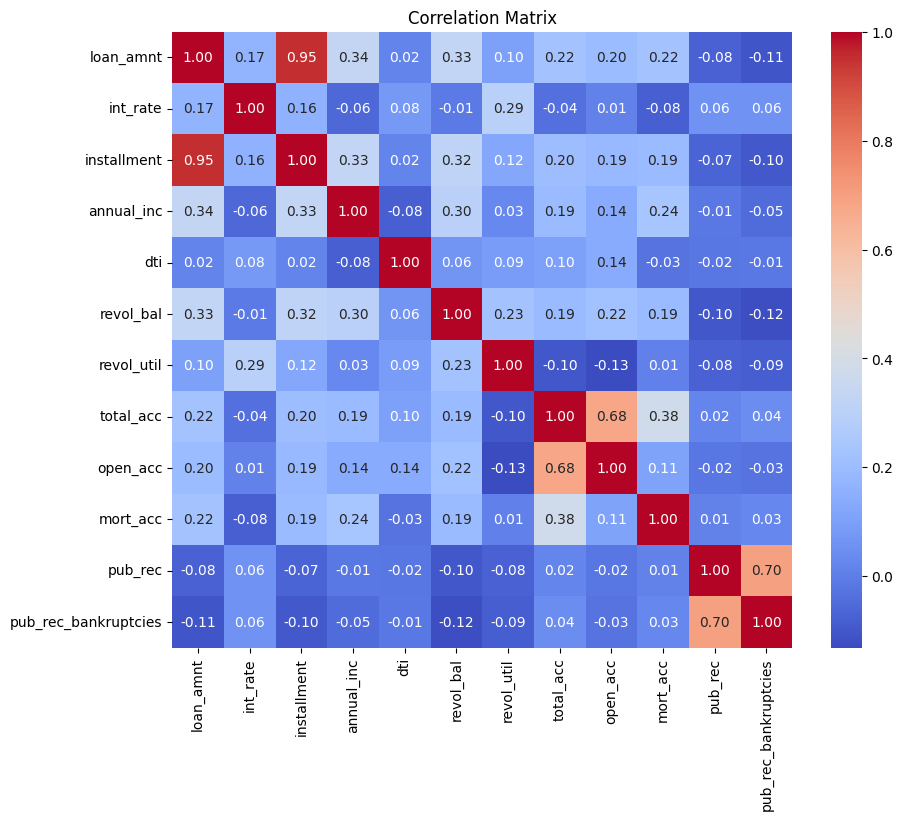

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[continuous_columns].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

* loan_amnt and installment (0.95): There is a very high positive correlation between the loan amount (loan_amnt) and the installment amount (installment). This makes sense because the installment is likely determined based on the loan amount and terms of the loan.

* loan_amnt and int_rate (0.17): A weak positive correlation between the loan amount (loan_amnt) and the interest rate (int_rate). This suggests that while there might be some influence of the loan size on the interest rate, it is not a strong relationship.

* installment and annual_inc (0.33): A moderate positive correlation exists between the installment amount (installment) and annual income (annual_inc). This indicates that higher income might correlate with higher installment payments, though it's not a very strong correlation.

* revol_bal and revol_util (0.89): There is a very strong positive correlation between revolving balance (revol_bal) and revolving utilization (revol_util). This makes sense, as higher credit balances are typically associated with higher utilization rates.

* revol_util and total_acc (0.68): A moderate positive correlation between revolving utilization (revol_util) and the total number of accounts (total_acc). This suggests that people with more accounts might also have higher credit utilization.

* open_acc and total_acc (0.68): A moderate positive correlation between the number of open accounts (open_acc) and the total number of accounts (total_acc). This is expected, as open accounts contribute to the total number of accounts.

* pub_rec and pub_rec_bankruptcies (0.70): A strong positive correlation between public records (pub_rec) and public record bankruptcies (pub_rec_bankruptcies). This indicates that if a borrower has public records, they are also more likely to have bankruptcies.

* mort_acc and open_acc (0.22): A weak positive correlation between mortgage accounts (mort_acc) and open accounts (open_acc). It suggests that individuals with mortgages might also have a slightly higher number of open accounts.

**Other Notable Points:**
* Negative Correlations: The correlations between certain variables are quite small or negative (e.g., loan_amnt with dti (-0.08), or mort_acc with total_acc (-0.13)), meaning that these variables are either weakly related or slightly inversely related.

* dti (Debt-to-Income Ratio): Generally, dti has weak correlations with most other variables, except for a slight negative correlation with installment (-0.08).

In summary, the most significant relationships are seen in the variables related to loan amounts, installment payments, revolving balance, and credit utilization. These correlations help understand how financial factors interact in the dataset.








##Continuous vs categorical

Loan amount vs Loan status

<ipython-input-11-dba611de1817>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='Set3')


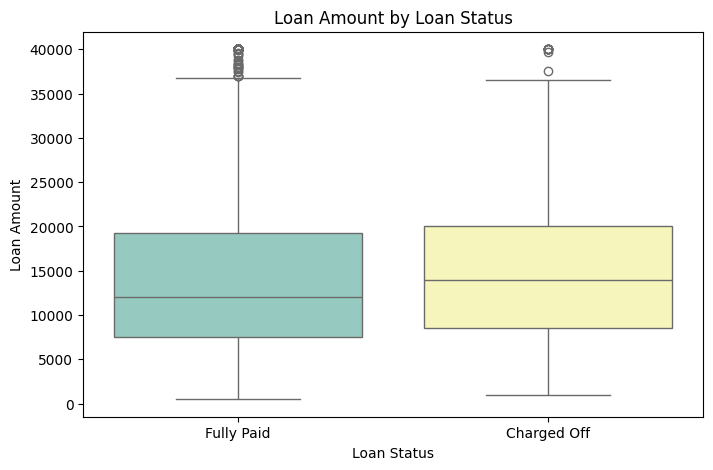

In [11]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='loan_status', y='loan_amnt', palette='Set3')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()

Very few people are there who took large amount of loan and charged off as compared to those who paid fully.

<ipython-input-12-f8d1ef79770e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purpose', y='annual_inc', palette='muted')


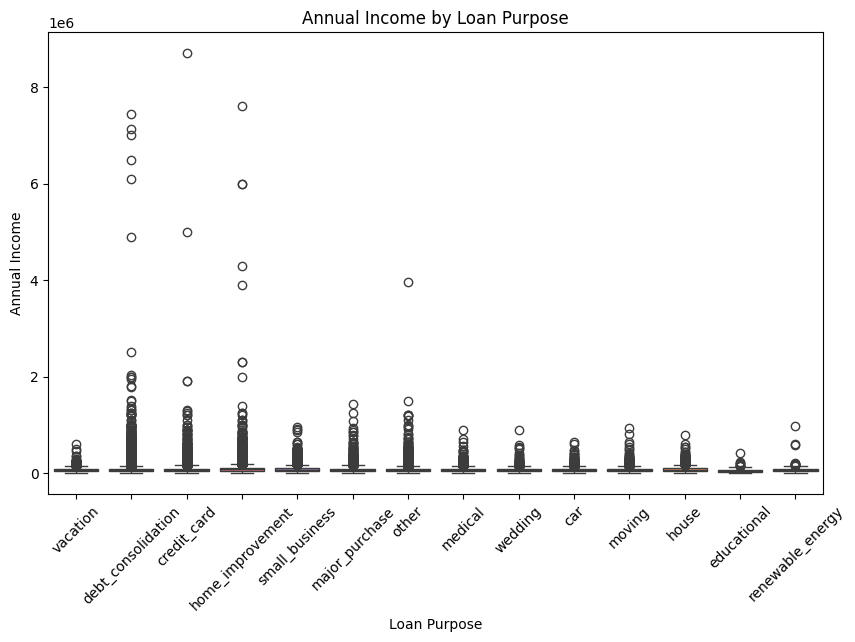

In [12]:

# Categorical vs Continuous: Loan Purpose vs Annual Income
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='purpose', y='annual_inc', palette='muted')
plt.title('Annual Income by Loan Purpose')
plt.xlabel('Loan Purpose')
plt.ylabel('Annual Income')
plt.xticks(rotation=45)
plt.show()

Low annual income people are taking loan for vacation, education, car etc.
Few of the people who take loan for the purpose of debt consolidation,  credit card, home improvement belong to high income margin.

# Feature Engineerning

##Handle duplicate record

In [13]:
def drop_duplicates(df):
  duplicate_count = df.duplicated().sum()
  print(f"{duplicate_count} duplicate records were removed")
  return df.drop_duplicates(keep='last')

In [14]:
df_dropped_duplicate=drop_duplicates(df)

0 duplicate records were removed


**Checking feature importance of categorical columns based on the nature of their values, data types**

In [15]:
object_columns = df.select_dtypes(include='object')
object_columns.nunique()

,0
term,2
grade,7
sub_grade,35
emp_title,173105
emp_length,11
home_ownership,6
verification_status,3
issue_d,115
loan_status,2
purpose,14


In [16]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [18]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [19]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [20]:
df['home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY'], dtype=object)

In [21]:
df['verification_status'].unique()

array(['Not Verified', 'Source Verified', 'Verified'], dtype=object)

In [22]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [23]:
df['title'].unique()

array(['Vacation', 'Debt consolidation', 'Credit card refinancing', ...,
       'Credit buster ', 'Loanforpayoff', 'Toxic Debt Payoff'],
      dtype=object)

In [24]:
df['issue_d'].unique()[:10]#date

array(['Jan-2015', 'Nov-2014', 'Apr-2013', 'Sep-2015', 'Sep-2012',
       'Oct-2014', 'Apr-2012', 'Jun-2013', 'May-2014', 'Dec-2015'],
      dtype=object)

In [25]:
df['earliest_cr_line'].unique()[:10]#date

array(['Jun-1990', 'Jul-2004', 'Aug-2007', 'Sep-2006', 'Mar-1999',
       'Jan-2005', 'Aug-2005', 'Sep-1994', 'Jun-1994', 'Dec-1997'],
      dtype=object)

Seasonal data from loan issue dates is likely not a strong predictor of loan creditworthiness.
Seasonality might introduce noise rather than meaningful signal because:

* Loan decisions should be based on borrower's financial characteristics
* Credit risk is more dependent on individual financial metrics
* Seasonal variations are unlikely to consistently impact loan repayment ability

Useful date-related features:

* Credit history length (total years)
* Time since earliest credit line
Age of credit history

Irrelevant seasonal features to avoid:

* Month of loan issue
* Specific seasonal periods
* Quarterly or monthly indicators

Let's introduce a new column having detail of length of credit history


In [26]:
def get_df_with_history_len(df):
  df_w_hist_len = df.copy()
  df_w_hist_len['credit_history_months'] = ((pd.to_datetime(df['issue_d'], errors='coerce') - pd.to_datetime(df['earliest_cr_line'], errors='coerce')).dt.days / 30.44).round(0)
  return df_w_hist_len

In [27]:
df_w_hist_len=get_df_with_history_len(df_dropped_duplicate)
df_w_hist_len.head()

<ipython-input-26-bb818b0b5817>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_w_hist_len['credit_history_months'] = ((pd.to_datetime(df['issue_d'], errors='coerce') - pd.to_datetime(df['earliest_cr_line'], errors='coerce')).dt.days / 30.44).round(0)
<ipython-input-26-bb818b0b5817>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_w_hist_len['credit_history_months'] = ((pd.to_datetime(df['issue_d'], errors='coerce') - pd.to_datetime(df['earliest_cr_line'], errors='coerce')).dt.days / 30.44).round(0)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,credit_history_months
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690",295.0
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113",126.0
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113",89.0
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813",98.0
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650",169.0


In [28]:
# sns.kdeplot(df_w_hist_len['credit_history_months'])

In [29]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [30]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT', 'DIRECT_PAY'], dtype=object)

**From the above observation based on the unique values and characteristics of the columns, here's an analysis of their usefulness for classification:**
* *Useless/Low-Value Columns:*

1. **title** - Extremely high unique values (48,816), likely too granular and noisy.
2. **address** - Very high unique values (393,700), not meaningful for classification.
3. **emp_title** - Extremely high unique values (173,105), too specific.
4. **issue_d** - Used to extract **credit_history_months** column, no more needed.
5. **earliest_cr_line** - Used to extract **credit_history_months** column, no more needed.

##Remove unused features

In [31]:
def remove_irrelevants(df):
  return df.drop(['title', 'address', 'emp_title', 'issue_d', 'earliest_cr_line'], axis=1)

In [32]:
df_w_relevant_cols=remove_irrelevants(df_w_hist_len)
df_w_relevant_cols.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'loan_status', 'purpose', 'dti', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'credit_history_months'],
      dtype='object')

##Handle Null value

**emp_length** column is categorical, so let's fill it with mode value

**revol_util**, **mort_acc**, **pub_rec_bankruptcies** columns have numerical value as well as they are both right skewed, so use median to fill NA.

In [33]:
def fill_na_vals(df):
  res=df.copy()
  res['emp_length']=res['emp_length'].fillna(res['emp_length'].mode()[0])
  res['revol_util']=res['revol_util'].fillna(res['revol_util'].median())
  res['mort_acc']=res['mort_acc'].fillna(res['mort_acc'].median())
  res['pub_rec_bankruptcies']=res['pub_rec_bankruptcies'].fillna(res['pub_rec_bankruptcies'].median())
  return res

In [34]:
df_na_handled=fill_na_vals(df_w_relevant_cols)
df_na_handled.isna().sum(axis=0)

,0
loan_amnt,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0
emp_length,0
home_ownership,0
annual_inc,0
verification_status,0


##Feature encoding

In [35]:
df_w_relevant_cols.select_dtypes(include='object').columns

Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'loan_status', 'purpose', 'initial_list_status',
       'application_type'],
      dtype='object')

Categorical Columns and Recommended Encoding
1. **term**:
* Unique Values: ['36 months', '60 months']
* Type: Nominal
* Recommended Encoding:
  * Label Encoding: Suitable since it has only two categories, which the model can interpret correctly.
2. **grade**:
* Unique Values: ['A', 'B', 'C', 'D', 'E', 'F', 'G']
* Type: Ordinal (higher grades likely indicate better creditworthiness).
* Recommended Encoding:
  * Ordinal Encoding: Assign meaningful numerical values based on the grade order (e.g., A → 1, B → 2, ... G → 7). This preserves the ordinal relationship.
3. sub_grade
* Unique Values: ['A1', 'A2', ..., 'G5'] (35 unique values).
* Type: Ordinal (subgrades refine grades further).
* Recommended Encoding:
  * Ordinal Encoding: Assign a numerical order to subgrades (e.g., A1 → 1, ..., G5 → 35).
This preserves the hierarchical relationship within subgrades.
4. emp_length
* Unique Values: ['10+ years', '4 years', '< 1 year', ..., '1 year', nan]
* Type: Ordinal (longer employment likely indicates stability).
* Recommended Encoding:
  * Ordinal Encoding: Map values to numbers (e.g., '< 1 year' → 0, 1 year → 1, ..., 10+ years → 10).
5. home_ownership
* Unique Values: ['RENT', 'MORTGAGE', 'OWN', 'OTHER', 'NONE', 'ANY']
* Type: Nominal
* Recommended Encoding:
  * One-Hot Encoding: Works well for models like linear regression or neural networks.
6. verification_status
* Unique Values: ['Not Verified', 'Source Verified', 'Verified']
* Type: Nominal
* Recommended Encoding:
  * One-Hot Encoding: If you need explicit binary columns.
7. purpose
* Unique Values: Categories like ['vacation', 'debt_consolidation', ..., 'renewable_energy'] (14 unique values).
* Type: Nominal
* Recommended Encoding:
  * One-Hot Encoding: Since there is no inherent order, this is the safest choice.
8. initial_list_status
* Unique Values: ['w', 'f']
* Type: Nominal
* Recommended Encoding:
  * Label Encoding: Simple binary variable that can be mapped directly (e.g., w → 0, f → 1).
9. application_type
* Unique Values: ['INDIVIDUAL', 'JOINT', 'DIRECT_PAY']
* Type: Nominal
* Recommended Encoding:
  * One-Hot Encoding: Preferred for most models.

10. loan_status (target variable)
* Unique Values: ['Fully Paid', 'Charged Off']
* Type: Nominal
* Recommended Encoding:
  * Label Encoding: 'Fully Paid' (recommend ):1, 'Charged Off' (do not recomment):0


In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

def encode_categorical_columns(df):
    res_df=df.copy()
    #label encoding
    res_df['term'] = df['term'].map({' 36 months': 0.0, ' 60 months': 1.0})
    res_df['initial_list_status'] = df['initial_list_status'].map({'w': 0.0, 'f': 1.0})
    res_df['loan_status'] = df['loan_status'].map({'Charged Off': 0.0, 'Fully Paid': 1.0})

    #ordinal encoding
    grade_ordinal_encoder = OrdinalEncoder(categories=[sorted(df['grade'].unique())])
    sub_grade_ordinal_encoder = OrdinalEncoder(categories=[sorted(df['sub_grade'].unique())])
    emp_length_ordinal_encoder = OrdinalEncoder(categories=[[
                 '< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years',
                 '6 years', '7 years', '8 years', '9 years', '10+ years'
                 ]])
    res_df['grade'] = grade_ordinal_encoder.fit_transform(df[['grade']])
    res_df['sub_grade'] = sub_grade_ordinal_encoder.fit_transform(df[['sub_grade']])
    res_df['emp_length'] = emp_length_ordinal_encoder.fit_transform(df[['emp_length']])

    #one hot encoding
    home_ownership_ohe=pd.get_dummies(df['home_ownership']).astype(float)
    verification_status_ohe=pd.get_dummies(df['verification_status']).astype(float)
    purpose_ohe=pd.get_dummies(df['purpose']).astype(float)
    application_type_ohe=pd.get_dummies(df['application_type']).astype(float)
    res_df=res_df.drop(columns=['home_ownership','verification_status','purpose','application_type'],axis=1)
    res_df=pd.concat([res_df,home_ownership_ohe,verification_status_ohe,purpose_ohe,application_type_ohe],axis=1)
    return res_df

In [37]:
df_encoded=encode_categorical_columns(df_na_handled)
df_encoded.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,loan_status,dti,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,DIRECT_PAY,INDIVIDUAL,JOINT
0,10000.0,0.0,11.44,329.48,1.0,8.0,10.0,117000.0,1.0,26.24,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8000.0,0.0,11.99,265.68,1.0,9.0,4.0,65000.0,1.0,22.05,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,15600.0,0.0,10.49,506.97,1.0,7.0,0.0,43057.0,1.0,12.79,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,7200.0,0.0,6.49,220.65,0.0,1.0,6.0,54000.0,1.0,2.60,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24375.0,1.0,17.27,609.33,2.0,14.0,9.0,55000.0,0.0,33.95,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 45 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   loan_amnt              396030 non-null  float64
 1   term                   396030 non-null  float64
 2   int_rate               396030 non-null  float64
 3   installment            396030 non-null  float64
 4   grade                  396030 non-null  float64
 5   sub_grade              396030 non-null  float64
 6   emp_length             396030 non-null  float64
 7   annual_inc             396030 non-null  float64
 8   loan_status            396030 non-null  float64
 9   dti                    396030 non-null  float64
 10  open_acc               396030 non-null  float64
 11  pub_rec                396030 non-null  float64
 12  revol_bal              396030 non-null  float64
 13  revol_util             396030 non-null  float64
 14  total_acc              396030 non-nu

#Preprocessing

##Train test split

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_tr_cv,X_test,y_tr_cv,y_test = train_test_split(df_encoded.drop(['loan_status'],axis=1).values,df_encoded['loan_status'].values,test_size=0.2,random_state=12)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=12)
print(X_train, X_val, X_test)

[[4.575e+03 0.000e+00 1.699e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.050e+04 0.000e+00 1.335e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.300e+04 0.000e+00 1.409e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [3.200e+04 0.000e+00 1.541e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.400e+04 1.000e+00 1.099e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.720e+04 0.000e+00 1.367e+01 ... 0.000e+00 1.000e+00 0.000e+00]] [[1.200e+04 0.000e+00 6.490e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 [1.400e+04 1.000e+00 1.580e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+04 0.000e+00 7.900e+00 ... 0.000e+00 1.000e+00 0.000e+00]
 ...
 [1.960e+04 1.000e+00 1.449e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.125e+03 0.000e+00 1.430e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [8.400e+03 0.000e+00 9.170e+00 ... 0.000e+00 1.000e+00 0.000e+00]] [[7.000e+03 0.000e+00 1.599e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.120e+04 1.000e+00 1.757e+01 ... 0.000e+00 1.000e+00 0.000e+00]
 [2.000e+04 1.000e+00 1.855e+01 ... 0.000e+00 1.00

##Standard scaling

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Model Creation

##Training

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

model=LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

##Evaluation

In [42]:
train_y_pred = model.predict(X_train)
test_y_pred = model.predict(X_test)

f1_train = f1_score(y_train, train_y_pred)
f1_test = f1_score(y_test, test_y_pred)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')

Training F1 score:0.8902630079756931, Testing F1 score:0.8889601550752214


In [43]:
import numpy as np
def accuracy(y_true, y_pred):
  return np.sum(y_true==y_pred)/y_true.shape[0]

In [44]:
print(f"training accuracy: {accuracy(y_train, model.predict(X_train))}")
print(f"validation accuracy: {accuracy(y_val, model.predict(X_val))}")
print(f"test accuracy: {accuracy(y_test, model.predict(X_test))}")

training accuracy: 0.8054440320177765
validation accuracy: 0.8070726965128905
test accuracy: 0.8032851046637881


# Hyper parameter tuning

**let's tune the regularization rate of our model.**

In [45]:
from sklearn.pipeline import make_pipeline
train_scores = []
val_scores = []
scaler = StandardScaler()
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la))
  scaled_lr.fit(X_train, y_train)
  train_score = accuracy(y_train, scaled_lr.predict(X_train))
  val_score = accuracy(y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

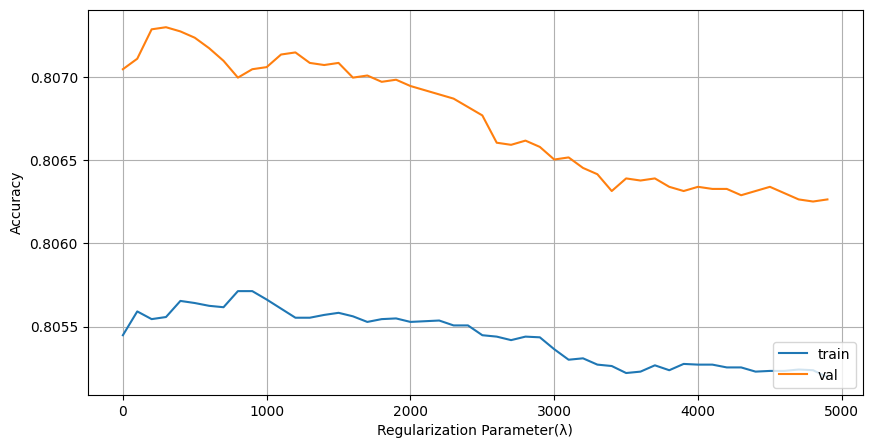

In [46]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

Let's take lambda value as 300 for this data and check the
results. Even though not much difference is seen.

In [47]:
model = LogisticRegression(C=1/300)
model.fit(X_train, y_train)
train_y_pred = model.predict(X_train)
test_y_pred = model.predict(X_test)
f1_train = f1_score(y_train, train_y_pred)
f1_test = f1_score(y_test, test_y_pred)
print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')
print(f"training accuracy: {accuracy(y_train, model.predict(X_train))}")
print(f"validation accuracy: {accuracy(y_val, model.predict(X_val))}")
print(f"test accuracy: {accuracy(y_test, model.predict(X_test))}")

Training F1 score:0.8904090418529631, Testing F1 score:0.8892053343206431
training accuracy: 0.8055576597732494
validation accuracy: 0.8072999520238365
test accuracy: 0.8035376107870615


# Classification Metrics

##Confusion matrix

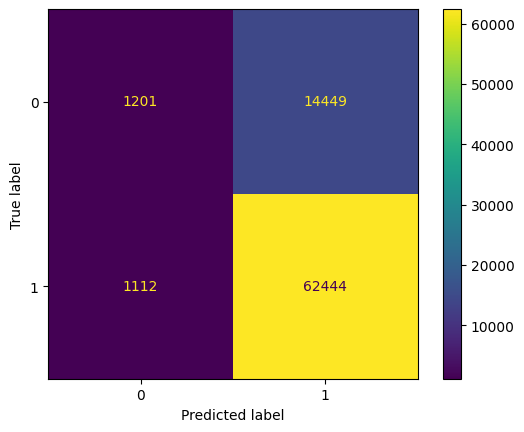

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(conf_matrix).plot()

## AU-ROC curve Code

In [49]:
from sklearn.metrics import roc_curve, roc_auc_score

In [50]:
probability = model.predict_proba(X_test)
probability

array([[0.17864951, 0.82135049],
       [0.25588721, 0.74411279],
       [0.5327321 , 0.4672679 ],
       ...,
       [0.11015112, 0.88984888],
       [0.08362227, 0.91637773],
       [0.12010971, 0.87989029]])

In [51]:
probability=probability[:, 1]

In [52]:
fpr, tpr, thr = roc_curve(y_test,probability)
print(f"false positive rate: {fpr}")
print(f"true positive rate: {tpr}")
print(f"threshold: {thr}")

false positive rate: [0.         0.         0.         ... 0.99968051 1.         1.        ]
true positive rate: [0.00000000e+00 1.57341557e-05 4.09088048e-04 ... 9.99984266e-01
 9.99984266e-01 1.00000000e+00]
threshold: [       inf 1.         0.99339876 ... 0.23774438 0.16855594 0.08697436]


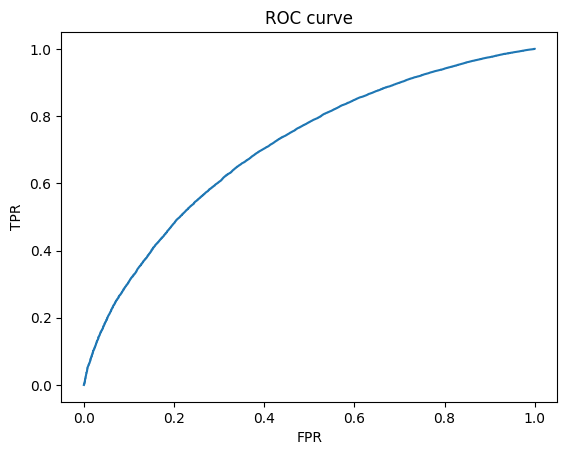

In [53]:
plt.plot(fpr,tpr)
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [54]:
roc_auc_score(y_test,probability)

0.7087695940507398

## Precision Recall curve

In [55]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [56]:
precision, recall, thr = precision_recall_curve(y_test, probability)

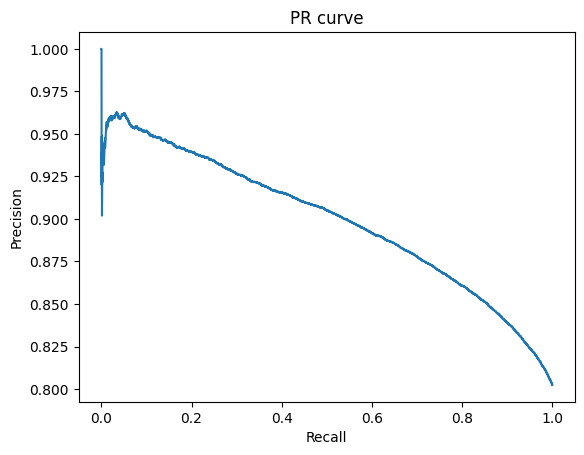

In [57]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [58]:
auc(recall, precision)

0.8992089759178841

**Optimize using SMOTE**

In [59]:
def training(model,X_train,y_train,X_test,y_test):

  model.fit(X_train, y_train)

  train_y_pred = model.predict(X_train)
  test_y_pred = model.predict(X_test)

  train_score = f1_score(y_train, train_y_pred)
  test_score = f1_score(y_test, test_y_pred)

  return train_score,test_score

In [60]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_sm, y_sm = smt.fit_resample(X_train, y_train)

model = LogisticRegression()

f1_train,f1_test = training(model,X_sm, y_sm,X_test,y_test)

print(f'Training F1 score:{f1_train}, Testing F1 score:{f1_test}')



Training F1 score:0.6631550150720569, Testing F1 score:0.7647436011613202


# Tradeoff Questions

1. **Minimizing False Positives**:  
   - Use precision as a key metric to reduce false positives.  
   - Implement cost-sensitive learning to weigh defaulters higher in the model.  
   - Utilize robust feature selection to focus on predictors highly indicative of defaults (e.g., DTI, credit history).  
   - Leverage ensemble methods (e.g., Random Forest, Gradient Boosting) to improve classification performance.

2. **Preventing NPAs (Non-Performing Assets)**:  
   - Prioritize recall to minimize missed defaulters (false negatives).  
   - Apply stricter approval thresholds and include early-warning indicators such as declining credit utilization or increasing debt.  
   - Regularly recalibrate the model with updated data to adapt to evolving borrower behavior.  
   - Include manual review for borderline cases flagged by the model.

---

# Actionable Insights & Recommendations

1. **Data Insights**: Focus on borrowers with high DTI, low sub-grades, or poor credit histories as they show higher default risks.  
2. **Model Improvements**: Implement explainable AI techniques to understand why loans are rejected, enabling transparent decision-making.  
3. **Operational Strategies**: Use segmentation (e.g., by purpose or employment length) to offer tailored products, enhancing loan approval while controlling risk.  
4. **Risk Mitigation**: Introduce dynamic credit limits and adjust interest rates based on individual risk profiles.  
5. **Continuous Monitoring**: Regularly monitor the model’s performance and update it with new data to capture trends in borrower behavior and market conditions.